# EDA on Loan Payments Data

This notebook will perform initial analysis and EDA (Exploratory Data Analysis) on Loan Payments Data.

## About The Data

* **Description -** This data set includes customers who have paid off their loans, who have been past due and put into collection without paying back their loan and interests, and who have paid off only after they were put in the collection. The financial product is a bullet loan that customers should pay off all of their loan debt in just one time by the end of the term, instead of an installment schedule. Of course, they could pay off earlier than their pay schedule.
* Data Source: [Link](https://www.kaggle.com/zhijinzhai/loandata)
* Data Format: .csv

## Content


* **Loan_id -** A unique loan number assigned to each loan customers

* **Loan_status -** Whether a loan is paid off, in collection, new customer yet to payoff, or paid off after the collection efforts

* **Principal -** Basic principal loan amount at the origination

* **terms -** Can be weekly (7 days), biweekly, and monthly payoff schedule

* **Effective_date -** When the loan got originated and took effects

* **Due_date -** Since it’s one-time payoff schedule, each loan has one single due date

* **Paidoff_time -** The actual time a customer pays off the loan

* **Pastdue_days -** How many days a loan has been past due

* **Age, education, gender -** A customer’s basic demographic information

In [133]:
# Import required libraries
import pandas as pd                       # It is fast, used for data analysis
import numpy as np                        # It is a large collection of high-level mathematical functions to operate on these arrays.
import matplotlib.pyplot as plt           # It is a state-based interface to matplotlib. It provides a MATLAB-like way of plotting.
import seaborn as sns                     # It is the data visualization library based on matplotlib. Provides a high-level interface.

## 1. Data Collection & Pre-processing

In [134]:
# Read the data
loan_data = pd.read_csv("/content/Loan payments data.csv")

In [135]:
# View the data (First & last 5 rows)
loan_data

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female
...,...,...,...,...,...,...,...,...,...,...,...
495,xqd20160496,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,10/14/2016 19:08,3.0,28,High School or Below,male
496,xqd20160497,COLLECTION_PAIDOFF,1000,15,9/12/2016,9/26/2016,10/10/2016 20:02,14.0,26,High School or Below,male
497,xqd20160498,COLLECTION_PAIDOFF,800,15,9/12/2016,9/26/2016,9/29/2016 11:49,3.0,30,college,male
498,xqd20160499,COLLECTION_PAIDOFF,1000,30,9/12/2016,11/10/2016,11/11/2016 22:40,1.0,38,college,female


In [136]:
# View rows and columns
loan_data.shape

(500, 11)

In [137]:
# Getting some basic info
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Loan_ID         500 non-null    object 
 1   loan_status     500 non-null    object 
 2   Principal       500 non-null    int64  
 3   terms           500 non-null    int64  
 4   effective_date  500 non-null    object 
 5   due_date        500 non-null    object 
 6   paid_off_time   400 non-null    object 
 7   past_due_days   200 non-null    float64
 8   age             500 non-null    int64  
 9   education       500 non-null    object 
 10  Gender          500 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 43.1+ KB


In [138]:
# Getting statistical measures of the data
loan_data.describe()

,Principal,terms,past_due_days,age
count,500.000000,500.000000,200.00000,500.000000
mean,943.200000,22.824000,36.01000,31.116000
std,115.240274,8.000064,29.38088,6.084784
min,300.000000,7.000000,1.00000,18.000000
25%,1000.000000,15.000000,3.00000,27.000000
50%,1000.000000,30.000000,37.00000,30.000000
75%,1000.000000,30.000000,60.00000,35.000000
max,1000.000000,30.000000,76.00000,51.000000


Find total the number of Null values & duplicate values in the data

In [139]:
# Find total number of null values
print("Total number of null Values... \n\n", loan_data.isnull().sum())

# Check the dataset for duplicate
print("\n Total number of duplicate Values =", loan_data.duplicated().sum())

Total number of null Values... 

 Loan_ID             0
loan_status         0
Principal           0
terms               0
effective_date      0
due_date            0
paid_off_time     100
past_due_days     300
age                 0
education           0
Gender              0
dtype: int64

 Total number of duplicate Values = 0


## 2. Visualizations

Look from above, there are some missing values in 2 columns -> paid_off_time (100) & past_due_days (300). No duplicate values are present in the data.

['PAIDOFF' 'COLLECTION' 'COLLECTION_PAIDOFF']


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


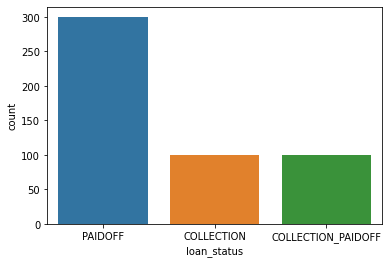

In [140]:
# Let's find the counted unique values of loan_status feature

print(loan_data.loan_status.unique())

ax = sns.countplot("loan_status", data=loan_data)

We have 3 labels for this target variables with the ratio of 3:1:1 (paid off: collection : collection paid off).

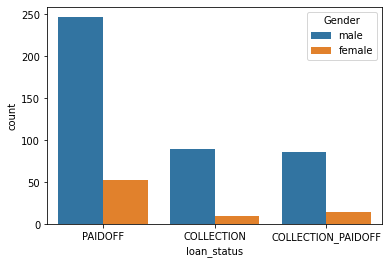

In [141]:
# Let's see loan_status based on Gender

ax = sns.countplot(x = "loan_status", data=loan_data, hue="Gender")

Above graph shows that female have lesser ratio of loans

[1000  300  800  900  700  500]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


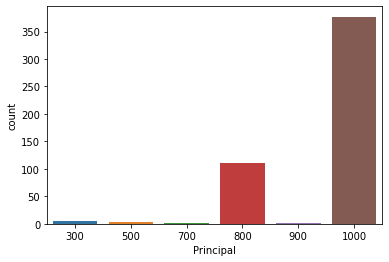

In [142]:
# Let's find the counted unique values of Principal feature

print(loan_data.Principal.unique())

ax = sns.countplot("Principal", data=loan_data)

Above graph shows that maximum principal amount is 1000

Let's move further and check how many people loan applications have been applied for weekly (7 days), Fortnightly (15 Days) , Monthly (30days) payment mode and whats the loan status with respect to principal

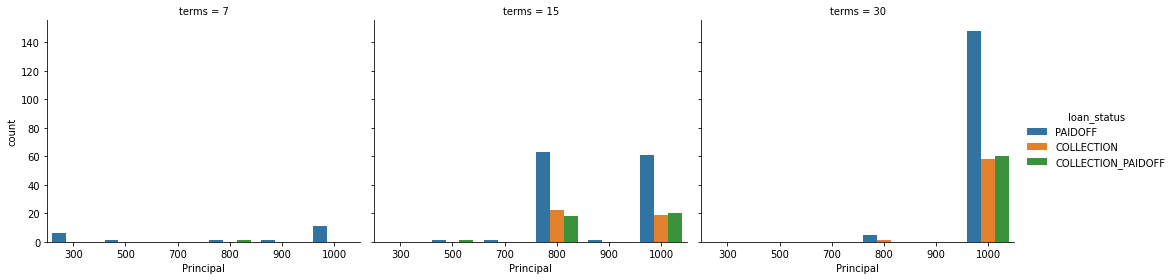

In [143]:
ax = sns.catplot(x = "Principal", data=loan_data, col= "terms", hue="loan_status", kind="count", height=4, aspect=1.2)

From above graph we can see that very few people go for weekly pay off, however fortnighty and monthly payment modes are quiet famous of principal amount 1000.
 
Most of the applications are having monthly mode as people do get monthly wages mostly from where they would like to pay off for the loan amount

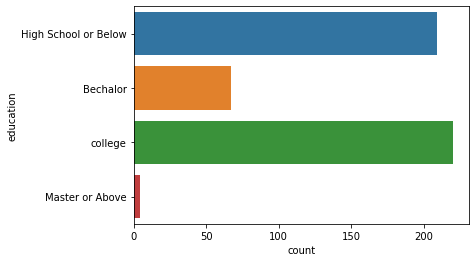

In [144]:
# Let's see education count
ax = sns.countplot(y = "education", data=loan_data)

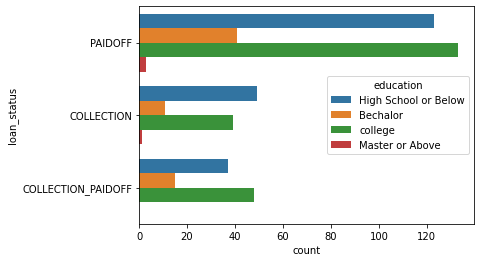

In [145]:
# Let's see loan_status based on education

ax = sns.countplot(y = "loan_status", data=loan_data, hue="education")

From above graph we can see high school or below and college students have taken loan for their studies and paid off

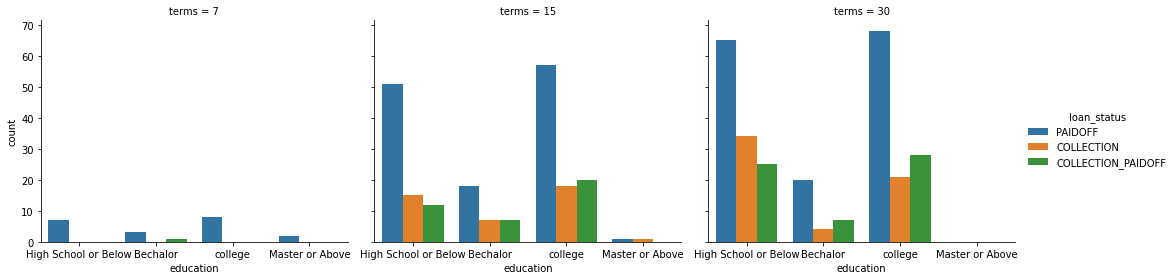

In [146]:
# Let's see how many students have pay their loan weekly (7 days), fortnightly (15 Days) , Monthly (30days)

ax = sns.catplot(x = "education", data=loan_data, col= "terms", hue="loan_status", kind="count", height=4, aspect=1.2)

We can see from above graph that high school or below and college students pay off their loans monthly (30 days) and fortnightly (15 days)

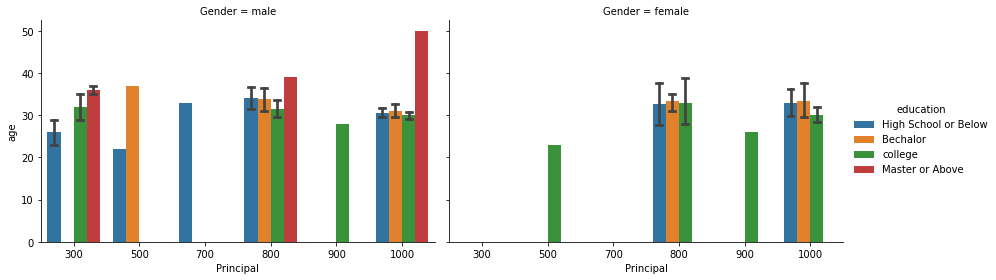

In [147]:
# Below visualisation shows us Age vs Principal amount with gender based on education

ax = sns.catplot(x = "Principal",y = "age", data=loan_data, col= "Gender", hue="education", kind="bar", height=4, aspect=1.5, capsize=0.09)

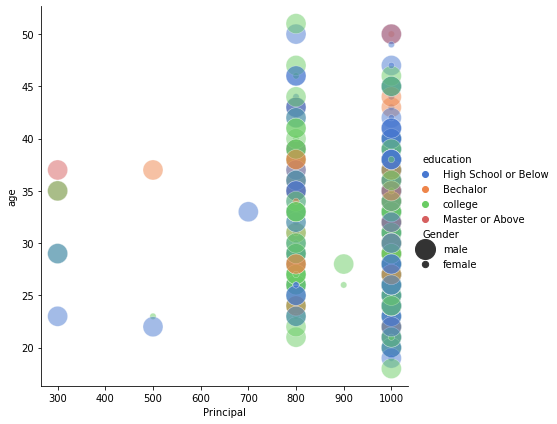

In [148]:
# Plot miles per gallon against horsepower with other semantics

sns.relplot(x="Principal", y="age", hue="education",size="Gender",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=loan_data)

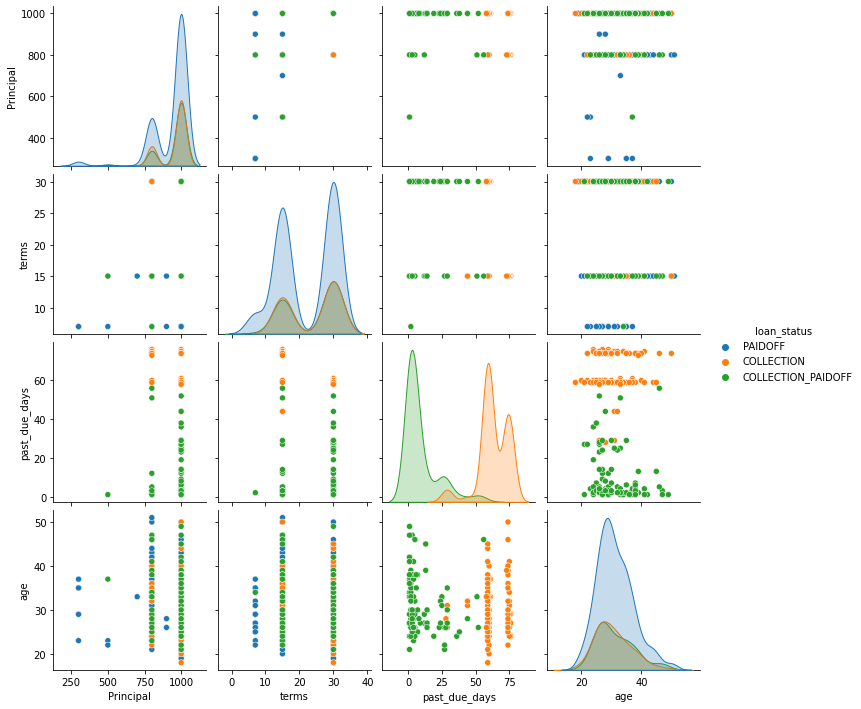

In [149]:
# Lets draw a pairplot to see data visualisation from different variables impact factor 

sns.pairplot(data=loan_data, hue="loan_status", kind="scatter", aspect=1)

In [150]:
# 500 - 300 / 500 * 100 = 40%
past_paid_percent = (loan_data.shape[0] - loan_data["past_due_days"].isnull().sum()) /loan_data.shape[0] * 100
print(past_paid_percent, "% people paid the loan after their respected due date")

40.0 % people paid the loan after their respected due date


From below visualisation we can see that 40% people paid loan after due date which is not a good figure we need to work on our loan collection process and streamlining the loan guidelines so that people pay before time rather than being defaulter

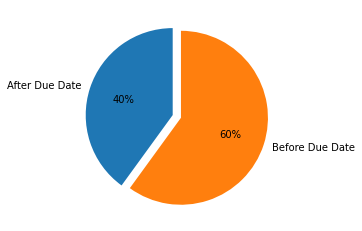

In [151]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:

labels = 'After Due Date', 'Before Due Date'
sizes = [past_paid_percent,100-past_paid_percent]
explode = (0, 0.1)  # only "explode" the 2nd slice

plt.pie(sizes, explode=explode, labels=labels, data=loan_data, startangle=90, autopct='%.0f%%')
plt.show()

## 3. Correlation

In [155]:
correlation = loan_data.corr()

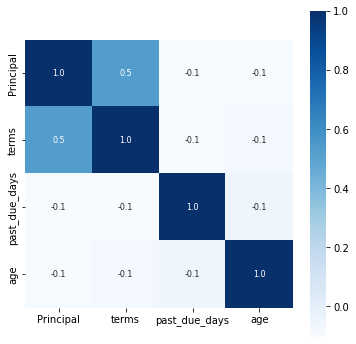

In [157]:
#Constructing a heatmap to understand the values
plt.figure(figsize=(6, 6))
sns.heatmap(correlation, fmt='.1f', cbar=True, square=True, annot=True,  cmap='Blues', annot_kws={'size':8})

Terms and principal are positively correlated to each other -> 0.5

Conclusion:

1. People going for higher studies or college apply for loan with Principal Amount of 800, 1000
2. Male candidates apply wide variety of loans
3. People who apply for loan of any age or gender maximum take 30 days (Monthly), some 15 days (fortnightly) and very less 7 days (Weekly) to pay off their loan
4. 40% of people applying for loans to this (xyz) bank are defaulters which means bank need to work on their policies and recovering rules 